# Neural Networks for Classification with TensorFlow/Keras
**Author:** Dr. Rishikesh Yadav / Vedant Vibhor 

This notebook demonstrates how to build, train, evaluate, and visualize a simple neural network for binary classification using TensorFlow/Keras. The workflow closely follows the structure of the original classification example, but uses TensorFlow.

In [1]:
import sys
print(sys.executable)

/Users/rishikeshyadav/Desktop/WorkshopIITMandi/workshop_env/bin/python3.10


In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

## Generate Synthetic Data

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n = 1000

# Generate two input features from a standard normal distribution
x1 = np.random.normal(0, 1, n)
x2 = np.random.normal(0, 1, n)

# Generate binary target: points outside a noisy circle are class 1, inside are class 0
y = ((x1**2 + x2**2 + np.random.normal(0, 1, n)) > 1.5).astype(int)

# Combine into a DataFrame for convenience
data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

## Visualize the Data

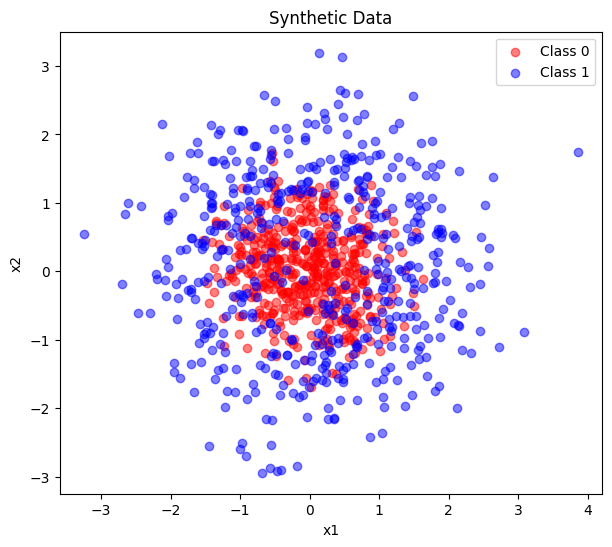

In [4]:
# Scatter plot of the two classes
plt.figure(figsize=(7,6))
plt.scatter(data[data.y==0].x1, data[data.y==0].x2, color='red', alpha=0.5, label='Class 0')
plt.scatter(data[data.y==1].x1, data[data.y==1].x2, color='blue', alpha=0.5, label='Class 1')
plt.title("Synthetic Data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

## Split Data into Training and Test Sets

In [5]:
# Split data: 70% train, 30% test
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42, shuffle=True)

# Separate features and target for training and testing
X_train = train_data[['x1', 'x2']].values
y_train = train_data['y'].values
X_test = test_data[['x1', 'x2']].values
y_test = test_data['y'].values

## Build the Neural Network Model

In [6]:
# Build a simple feedforward neural network using Keras Sequential API
model = keras.Sequential([
    keras.layers.Input(shape=(2,)),           # Input layer: 2 features
    keras.layers.Dense(10, activation='sigmoid'),  # Hidden layer: 10 neurons, sigmoid activation
    keras.layers.Dense(1, activation='sigmoid')    # Output layer: 1 neuron, sigmoid activation for binary classification
])

# Print model summary to see architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

## Compile the Model

In [7]:
# Compile the model with binary crossentropy loss, Adam optimizer, and accuracy metric
model.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.1),
    metrics=['accuracy']
)

## Train the Neural Network

In [8]:
# Train the model on the training data
# epochs: number of times to iterate over the training data
# batch_size: number of samples per gradient update
# verbose=1: show progress bar
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5695 - loss: 0.7051 - val_accuracy: 0.5067 - val_loss: 0.6896
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5876 - loss: 0.6784 - val_accuracy: 0.4733 - val_loss: 0.6779
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6160 - loss: 0.6499 - val_accuracy: 0.6600 - val_loss: 0.6147
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7429 - loss: 0.5578 - val_accuracy: 0.7567 - val_loss: 0.5023
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8089 - loss: 0.4615 - val_accuracy: 0.8000 - val_loss: 0.4312
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8098 - loss: 0.4150 - val_accuracy: 0.8033 - val_loss: 0.4089
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8377 - loss: 0.3852 - val_accuracy: 0.8400 - val_loss: 0.4019
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8078 - loss: 0.4093 - val_accuracy: 0.7900 - v

## Plot Training and Validation Accuracy and Loss

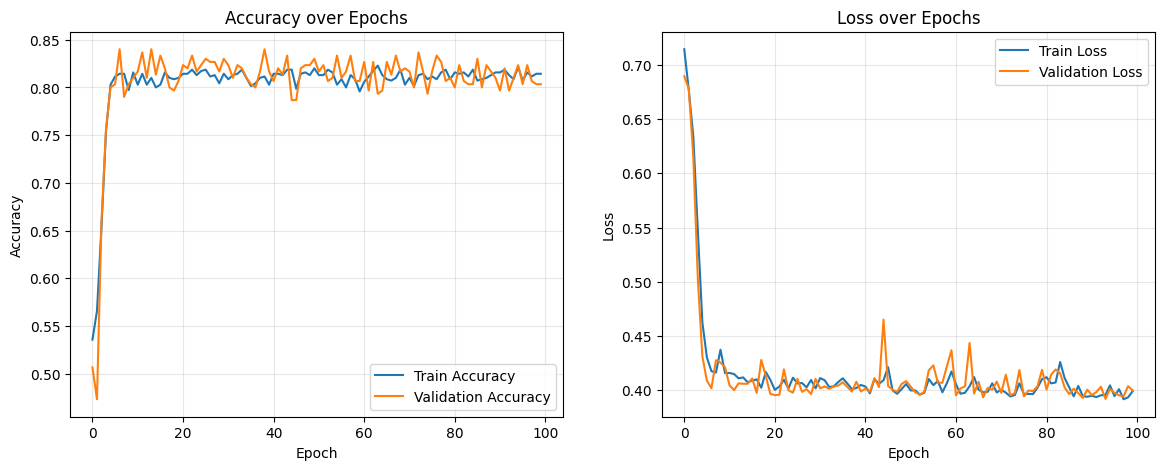

In [9]:
# Plot accuracy and loss curves for training and validation
fig, ax = plt.subplots(1, 2, figsize=(14,5))

# Plot accuracy
ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Accuracy over Epochs')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()
ax[0].grid(True, alpha=0.3)

# Plot loss
ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Loss over Epochs')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()
ax[1].grid(True, alpha=0.3)

plt.show()

## Evaluate the Model on Test Data

In [10]:
# Predict probabilities on test set
y_pred_prob = model.predict(X_test, verbose=0)

# Convert probabilities to binary class predictions (threshold 0.5)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Compute confusion matrix and accuracy
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print(f"Accuracy: {acc:.4f}")

Confusion Matrix:
 [[123  26]
 [ 33 118]]
Accuracy: 0.8033


## Plot Decision Boundary

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step


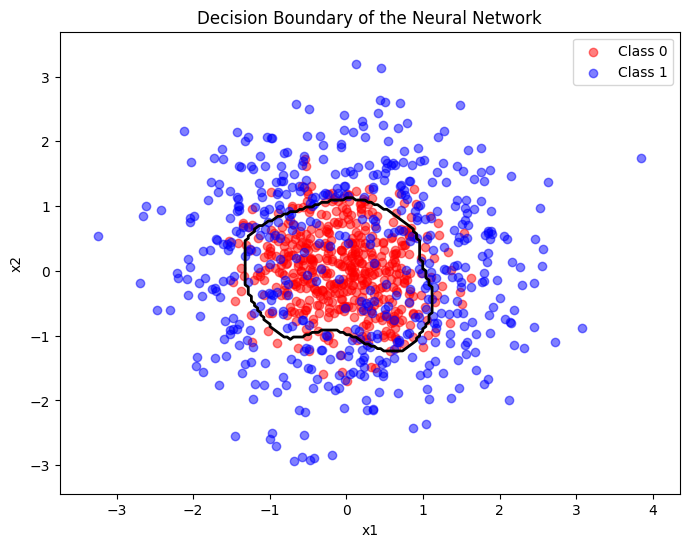

In [11]:
# Create a mesh grid for plotting the decision boundary
x1_min, x1_max = data.x1.min() - 0.5, data.x1.max() + 0.5
x2_min, x2_max = data.x2.min() - 0.5, data.x2.max() + 0.5
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                       np.linspace(x2_min, x2_max, 200))
grid_points = np.c_[xx1.ravel(), xx2.ravel()]

# Predict probabilities for each point in the grid
grid_pred_prob = model.predict(grid_points)
grid_pred = (grid_pred_prob > 0.5).astype(int).reshape(xx1.shape)

# Plot the decision boundary and data points
plt.figure(figsize=(8,6))
plt.scatter(data[data.y==0].x1, data[data.y==0].x2, color='red', alpha=0.5, label='Class 0')
plt.scatter(data[data.y==1].x1, data[data.y==1].x2, color='blue', alpha=0.5, label='Class 1')
plt.contour(xx1, xx2, grid_pred, levels=[0.5], colors='k', linewidths=2)
plt.title("Decision Boundary of the Neural Network")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

## Conclusion

In this notebook, we constructed a basic neural network for binary classification using TensorFlow/Keras. We covered the essential components of neural networks and demonstrated how to train and evaluate a neural network on synthetic data. The model's decision boundary was visualized to understand how it classifies the data. Remarkably, the results look very similar to what we achieved in when we code our NNs from scratch.
